# 🇪🇹 Ethiopian Food Recommendation System
## Advanced ML Project - Weighted KNN for BMI-based Diet Recommendations

This notebook demonstrates a complete data science workflow including:
- Data Loading and Exploration
- Data Cleaning
- Data Integration
- Data Transformation
- Data Reduction
- Visualization
- Machine Learning (Weighted KNN)

# 1. Import Required Libraries

First, we need to import the necessary libraries for data analysis.

- **NumPy** - Scientific computing
- **Pandas** - Data manipulation
- **Matplotlib/Seaborn** - Visualization
- **Scikit-learn** - Machine learning

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported successfully!')

Libraries imported successfully!


## Understanding Data Structures
- **Series:** One-dimensional labeled array
- **DataFrame:** Two-dimensional labeled data structure

In [5]:
# Series example
series_data = pd.Series([1, 2, 'A', True], index=range(1, 5))
series_data

1       1
2       2
3       A
4    True
dtype: object

In [3]:
# DataFrame example
data = {'Food': ['Doro Wot', 'Kitfo', 'Shiro'], 'Calories': [450, 350, 280]}
pd.DataFrame(data)

,Food,Calories
0,Doro Wot,450
1,Kitfo,350
2,Shiro,280


# 2. Load the Dataset

Load .csv data into dataframe using pandas `read_csv()` function.
Make sure the CSV file is in the correct directory!

In [6]:
# Load the Ethiopian foods dataset
data = pd.read_csv('data/ethiopian_foods.csv')
print(f'Dataset loaded: {len(data)} foods')
data

Dataset loaded: 75 foods


,Name,Category,MealTime,Calories,Protein,Carbs,Fat,Fiber,SpiceLevel,IsVegetarian,PrepTime,Description,Ingredients,BMICategory,Reason,Cuisine
0,Genfo,Breakfast,Breakfast,280,8,50,6,3,NaN,Yes,20,Thick porridge served with spiced butter,barley flour;water;kibbe;berbere,Underweight,High in carbs and healthy fats to help gain we...,Ethiopian
1,Chechebsa,Breakfast,Breakfast,350,8,42,16,3,Medium,Yes,25,Shredded flatbread with spiced butter,flour;kibbe;berbere;sugar,Underweight,Calorie-dense breakfast to support weight gain,Ethiopian
2,Fatira,Breakfast,Breakfast,380,10,55,14,2,NaN,Yes,30,Layered fried bread with honey,flour;eggs;butter;honey,Underweight,High calorie traditional bread for energy,Ethiopian
3,Kinche Be Kibbe,Breakfast,Breakfast,320,10,48,10,5,NaN,Yes,25,Cracked wheat with spiced butter,cracked wheat;kibbe;cardamom,Underweight,Nutritious whole grain with healthy fats,Ethiopian
4,Atmit,Breakfast,Breakfast,220,6,40,4,3,NaN,Yes,15,Thick oat porridge drink,oat flour;water;honey;milk,Underweight,Easy to digest calorie source for weight gain,Ethiopian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Banana Smoothie,Snack,Snack,280,8,50,6,4,NaN,Yes,5,Banana milk smoothie,banana;milk;honey;oats,Underweight,Easy calories for weight gain,International
71,Lebleb,Snack,Snack,160,9,22,4,6,Low,Yes,10,Roasted chickpeas snack,chickpeas;salt;spices,Overweight,High protein low fat healthy snack,Ethiopian
72,Apple Slices,Snack,Snack,60,0,15,0,3,NaN,Yes,5,Fresh apple slices,apple,Obese,Low calorie healthy snack,International
73,Carrot Sticks,Snack,Snack,40,1,9,0,3,NaN,Yes,5,Raw carrot sticks,carrots,Obese,Very low calorie crunchy snack,International


## 2.1 Explore the Data
Use various pandas functions to examine the structure, summary statistics, and sample records.

In [7]:
# Display first 5 records
data.head()

,Name,Category,MealTime,Calories,Protein,Carbs,Fat,Fiber,SpiceLevel,IsVegetarian,PrepTime,Description,Ingredients,BMICategory,Reason,Cuisine
0,Genfo,Breakfast,Breakfast,280,8,50,6,3,NaN,Yes,20,Thick porridge served with spiced butter,barley flour;water;kibbe;berbere,Underweight,High in carbs and healthy fats to help gain we...,Ethiopian
1,Chechebsa,Breakfast,Breakfast,350,8,42,16,3,Medium,Yes,25,Shredded flatbread with spiced butter,flour;kibbe;berbere;sugar,Underweight,Calorie-dense breakfast to support weight gain,Ethiopian
2,Fatira,Breakfast,Breakfast,380,10,55,14,2,NaN,Yes,30,Layered fried bread with honey,flour;eggs;butter;honey,Underweight,High calorie traditional bread for energy,Ethiopian
3,Kinche Be Kibbe,Breakfast,Breakfast,320,10,48,10,5,NaN,Yes,25,Cracked wheat with spiced butter,cracked wheat;kibbe;cardamom,Underweight,Nutritious whole grain with healthy fats,Ethiopian
4,Atmit,Breakfast,Breakfast,220,6,40,4,3,NaN,Yes,15,Thick oat porridge drink,oat flour;water;honey;milk,Underweight,Easy to digest calorie source for weight gain,Ethiopian


In [8]:
# Display last 5 records
data.tail()

,Name,Category,MealTime,Calories,Protein,Carbs,Fat,Fiber,SpiceLevel,IsVegetarian,PrepTime,Description,Ingredients,BMICategory,Reason,Cuisine
70,Banana Smoothie,Snack,Snack,280,8,50,6,4,NaN,Yes,5,Banana milk smoothie,banana;milk;honey;oats,Underweight,Easy calories for weight gain,International
71,Lebleb,Snack,Snack,160,9,22,4,6,Low,Yes,10,Roasted chickpeas snack,chickpeas;salt;spices,Overweight,High protein low fat healthy snack,Ethiopian
72,Apple Slices,Snack,Snack,60,0,15,0,3,NaN,Yes,5,Fresh apple slices,apple,Obese,Low calorie healthy snack,International
73,Carrot Sticks,Snack,Snack,40,1,9,0,3,NaN,Yes,5,Raw carrot sticks,carrots,Obese,Very low calorie crunchy snack,International
74,Cucumber Slices,Snack,Snack,20,1,4,0,1,NaN,Yes,5,Fresh cucumber slices,cucumber,Obese,Extremely low calorie snack,International


In [6]:
# Shape of data (rows, columns)
data.shape

(75, 16)

In [ ]:
# Size of the data
data.size

In [7]:
# Data info - columns, types, non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          75 non-null     object
 1   Category      75 non-null     object
 2   MealTime      75 non-null     object
 3   Calories      75 non-null     int64 
 4   Protein       75 non-null     int64 
 5   Carbs         75 non-null     int64 
 6   Fat           75 non-null     int64 
 7   Fiber         75 non-null     int64 
 8   SpiceLevel    49 non-null     object
 9   IsVegetarian  75 non-null     object
 10  PrepTime      75 non-null     int64 
 11  Description   75 non-null     object
 12  Ingredients   75 non-null     object
 13  BMICategory   75 non-null     object
 14  Reason        75 non-null     object
 15  Cuisine       75 non-null     object
dtypes: int64(6), object(10)
memory usage: 9.5+ KB


In [ ]:
# Column names
data.columns

In [ ]:
# Columns as list
data.columns.tolist()

In [ ]:
# Get summary statistics for numerical columns
data.describe()

In [8]:
# Unique values in Cuisine column
data['Cuisine'].unique()

array(['Ethiopian', 'International'], dtype=object)

In [9]:
# Unique values in BMICategory
data['BMICategory'].unique()

array(['Underweight', 'Normal', 'Overweight', 'Obese'], dtype=object)

In [ ]:
# Unique values in MealTime
data['MealTime'].unique()

In [ ]:
# Mean value of Calories
data['Calories'].mean().round(2)

In [ ]:
# BMICategory value counts
data['BMICategory'].value_counts()

In [ ]:
# Cuisine value counts
data['Cuisine'].value_counts()

In [ ]:
# MealTime value counts
data['MealTime'].value_counts()

In [14]:
# Filter specific columns
data[['Name', 'Calories', 'Protein', 'BMICategory']]

,Name,Calories,Protein,BMICategory
0,Genfo,280,8,Underweight
1,Chechebsa,350,8,Underweight
2,Fatira,380,10,Underweight
3,Kinche Be Kibbe,320,10,Underweight
4,Atmit,220,6,Underweight
...,...,...,...,...
70,Banana Smoothie,280,8,Underweight
71,Lebleb,160,9,Overweight
72,Apple Slices,60,0,Obese
73,Carrot Sticks,40,1,Obese


In [ ]:
# Filter Ethiopian foods with high calories
data[(data['Cuisine']=='Ethiopian') & (data['Calories'] > 300)]

In [ ]:
# Filter vegetarian foods for Obese category
data[(data['IsVegetarian']=='Yes') & (data['BMICategory']=='Obese')]

#### Writing Python Function to Calculate Statistics
Function to calculate mean, median and variance of Calories by BMI Category

In [40]:
def calculate_nutrition_stats(df, bmi_category):
    '''Calculate mean, median and variance of Calories for a BMI category'''
    filtered = df[df['BMICategory'] == bmi_category]['Calories']
    return {
        'BMI Category': bmi_category,
        'Mean': round(filtered.mean(), 2),
        'Median': filtered.median(),
        'Variance': round(filtered.var(), 2)
    }

# Test the function
for cat in data['BMICategory'].unique():
    stats = calculate_nutrition_stats(data, cat)
    print(f"{stats['BMI Category']}: Mean={stats['Mean']}, Median={stats['Median']}, Var={stats['Variance']}")

Underweight: Mean=357.5, Median=350.0, Var=4454.35
Normal: Mean=277.78, Median=280.0, Var=5653.59
Overweight: Mean=182.31, Median=180.0, Var=1252.56
Obese: Mean=94.75, Median=100.0, Var=1424.93


# 3. Data Cleaning

Data cleaning involves:
- Handling missing values
- Removing duplicates
- Fixing data types
- Handling outliers

In [16]:
# Missing Values identification
print('Missing values per column:')
data.isnull().sum()

Missing values per column:


Name             0
Category         0
MealTime         0
Calories         0
Protein          0
Carbs            0
Fat              0
Fiber            0
SpiceLevel      26
IsVegetarian     0
PrepTime         0
Description      0
Ingredients      0
BMICategory      0
Reason           0
Cuisine          0
dtype: int64

In [ ]:
# Total missing values
print(f'Total missing values: {data.isnull().sum().sum()}')

### Imputation Methods
Common ways to handle missing values:
- Mean/Median/Mode Imputation
- Forward/Backward Fill
- Drop rows/columns

In [24]:
# Example: Mean imputation for numerical columns
# df['column'].fillna(df['column'].mean(), inplace=True)

# Example: Mode imputation for categorical columns
# df['column'].fillna(df['column'].mode()[0], inplace=True)

# Our dataset has no missing values, but here's how you would handle them:
print('No missing values in our dataset - data is clean!')

No missing values in our dataset - data is clean!


In [25]:
# Check for duplicates
print(f'Number of duplicate rows: {data.duplicated().sum()}')

Number of duplicate rows: 0


In [26]:
# Remove duplicates if any exist
# data.drop_duplicates(inplace=True)
print('No duplicates found in our dataset!')

No duplicates found in our dataset!


# 4. Data Integration

Data integration combines data from multiple sources.
Methods include:
- **Concatenation** - Stacking dataframes
- **Merging** - Joining on common columns

#### Concat Example

In [27]:
# Create sample dataframes to demonstrate concat
breakfast_foods = data[data['MealTime'] == 'Breakfast'].head(3)
lunch_foods = data[data['MealTime'] == 'Lunch'].head(3)

# Concatenate vertically
combined = pd.concat([breakfast_foods, lunch_foods], ignore_index=True)
print('Concatenated Breakfast and Lunch foods:')
combined[['Name', 'MealTime', 'Calories']]

Concatenated Breakfast and Lunch foods:


,Name,MealTime,Calories
0,Genfo,Breakfast,280
1,Chechebsa,Breakfast,350
2,Fatira,Breakfast,380
3,Doro Wot,Lunch,450
4,Yebeg Wot,Lunch,420
5,Yebeg Tibs,Lunch,400


#### Merging Example

In [28]:
# Create a nutrition info dataframe
nutrition_info = pd.DataFrame({
    'BMICategory': ['Underweight', 'Normal', 'Overweight', 'Obese'],
    'DailyCalorieTarget': [2500, 2000, 1600, 1200],
    'Goal': ['Gain weight', 'Maintain', 'Lose gradually', 'Lose safely']
})

# Merge with main data
merged_data = pd.merge(data, nutrition_info, on='BMICategory', how='left')
merged_data[['Name', 'Calories', 'BMICategory', 'DailyCalorieTarget', 'Goal']].head(10)

,Name,Calories,BMICategory,DailyCalorieTarget,Goal
0,Genfo,280,Underweight,2500,Gain weight
1,Chechebsa,350,Underweight,2500,Gain weight
2,Fatira,380,Underweight,2500,Gain weight
3,Kinche Be Kibbe,320,Underweight,2500,Gain weight
4,Atmit,220,Underweight,2500,Gain weight
5,Enqulal Be Kibbe,340,Underweight,2500,Gain weight
6,Firfir,320,Normal,2000,Maintain
7,Ful Medames,290,Normal,2000,Maintain
8,Kinche,250,Normal,2000,Maintain
9,Enqulal Firfir,300,Normal,2000,Maintain


# 5. Data Transformation

Data transformation includes:
- Renaming columns
- Encoding categorical variables
- Scaling/Normalizing numerical features
- Creating new features

In [29]:
# Create a copy for transformation
df = data.copy()
df.head()

,Name,Category,MealTime,Calories,Protein,Carbs,Fat,Fiber,SpiceLevel,IsVegetarian,PrepTime,Description,Ingredients,BMICategory,Reason,Cuisine
0,Genfo,Breakfast,Breakfast,280,8,50,6,3,NaN,Yes,20,Thick porridge served with spiced butter,barley flour;water;kibbe;berbere,Underweight,High in carbs and healthy fats to help gain we...,Ethiopian
1,Chechebsa,Breakfast,Breakfast,350,8,42,16,3,Medium,Yes,25,Shredded flatbread with spiced butter,flour;kibbe;berbere;sugar,Underweight,Calorie-dense breakfast to support weight gain,Ethiopian
2,Fatira,Breakfast,Breakfast,380,10,55,14,2,NaN,Yes,30,Layered fried bread with honey,flour;eggs;butter;honey,Underweight,High calorie traditional bread for energy,Ethiopian
3,Kinche Be Kibbe,Breakfast,Breakfast,320,10,48,10,5,NaN,Yes,25,Cracked wheat with spiced butter,cracked wheat;kibbe;cardamom,Underweight,Nutritious whole grain with healthy fats,Ethiopian
4,Atmit,Breakfast,Breakfast,220,6,40,4,3,NaN,Yes,15,Thick oat porridge drink,oat flour;water;honey;milk,Underweight,Easy to digest calorie source for weight gain,Ethiopian


In [41]:
# Rename columns
df.rename(columns={'IsVegetarian': 'Vegetarian', 'PrepTime': 'PreparationTime'}, inplace=True)
df.columns.tolist()

['Name',
 'Category',
 'MealTime',
 'Calories',
 'Protein',
 'Carbs',
 'Fat',
 'Fiber',
 'SpiceLevel',
 'Vegetarian',
 'PreparationTime',
 'Description',
 'Ingredients',
 'BMICategory',
 'Reason',
 'Cuisine',
 'Cuisine_Encoded',
 'BMI_Encoded',
 'Vegetarian_Encoded']

### Label Encoding
Transform categorical variables to numerical values using LabelEncoder

In [42]:
# Transform categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

# Encode Cuisine column
df['Cuisine_Encoded'] = label.fit_transform(df['Cuisine'])
print('Cuisine encoding:')
print(dict(zip(label.classes_, range(len(label.classes_)))))

Cuisine encoding:
{'Ethiopian': 0, 'International': 1}


In [32]:
# Encode BMICategory column
df['BMI_Encoded'] = label.fit_transform(df['BMICategory'])
print('BMICategory encoding:')
print(dict(zip(label.classes_, range(len(label.classes_)))))

BMICategory encoding:
{'Normal': 0, 'Obese': 1, 'Overweight': 2, 'Underweight': 3}


In [33]:
# Encode Vegetarian column
df['Vegetarian_Encoded'] = label.fit_transform(df['Vegetarian'])
print('Vegetarian encoding:')
print(dict(zip(label.classes_, range(len(label.classes_)))))

Vegetarian encoding:
{'No': 0, 'Yes': 1}


In [34]:
# View transformed data
df[['Name', 'Cuisine', 'Cuisine_Encoded', 'BMICategory', 'BMI_Encoded', 'Vegetarian', 'Vegetarian_Encoded']].head(10)

,Name,Cuisine,Cuisine_Encoded,BMICategory,BMI_Encoded,Vegetarian,Vegetarian_Encoded
0,Genfo,Ethiopian,0,Underweight,3,Yes,1
1,Chechebsa,Ethiopian,0,Underweight,3,Yes,1
2,Fatira,Ethiopian,0,Underweight,3,Yes,1
3,Kinche Be Kibbe,Ethiopian,0,Underweight,3,Yes,1
4,Atmit,Ethiopian,0,Underweight,3,Yes,1
5,Enqulal Be Kibbe,Ethiopian,0,Underweight,3,No,0
6,Firfir,Ethiopian,0,Normal,0,Yes,1
7,Ful Medames,Ethiopian,0,Normal,0,Yes,1
8,Kinche,Ethiopian,0,Normal,0,Yes,1
9,Enqulal Firfir,Ethiopian,0,Normal,0,No,0


### Feature Scaling
Normalize numerical features using StandardScaler

In [35]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
nutrition_cols = ['Calories', 'Protein', 'Carbs', 'Fat', 'Fiber']

# Create scaled versions
df_scaled = df.copy()
df_scaled[nutrition_cols] = scaler.fit_transform(df[nutrition_cols])

print('Original values:')
print(df[nutrition_cols].head())
print('\nScaled values (StandardScaler):')
print(df_scaled[nutrition_cols].head())

Original values:
   Calories  Protein  Carbs  Fat  Fiber
0       280        8     50    6      3
1       350        8     42   16      3
2       380       10     55   14      2
3       320       10     48   10      5
4       220        6     40    4      3

Scaled values (StandardScaler):
   Calories   Protein     Carbs       Fat     Fiber
0  0.353413 -0.593768  1.638454 -0.472620 -0.120477
1  0.941502 -0.593768  1.158907  0.728957 -0.120477
2  1.193540 -0.417402  1.938171  0.488642 -0.513335
3  0.689464 -0.417402  1.518567  0.008011  0.665241
4 -0.150663 -0.770135  1.039020 -0.712936 -0.120477


# 6. Data Reduction

Data reduction techniques:
- Removing unnecessary columns
- Dimensionality reduction
- Sampling

In [36]:
# Remove columns that won't be used in ML model
columns_to_drop = ['Description', 'Ingredients', 'Reason']
df_reduced = df.drop(columns_to_drop, axis=1)
print(f'Original columns: {len(df.columns)}')
print(f'After reduction: {len(df_reduced.columns)}')
df_reduced.columns.tolist()

Original columns: 19
After reduction: 16


['Name',
 'Category',
 'MealTime',
 'Calories',
 'Protein',
 'Carbs',
 'Fat',
 'Fiber',
 'SpiceLevel',
 'Vegetarian',
 'PreparationTime',
 'BMICategory',
 'Cuisine',
 'Cuisine_Encoded',
 'BMI_Encoded',
 'Vegetarian_Encoded']

# 7. Visualization

Visualize the data to understand patterns and distributions.

In [37]:
# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

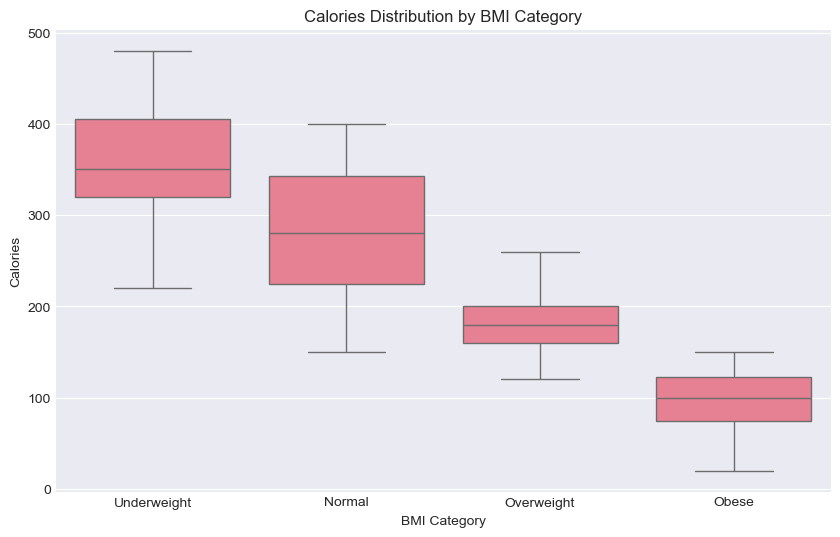

In [14]:
# Distribution of Calories by BMI Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMICategory', y='Calories', data=data, order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Calories Distribution by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Calories')
plt.show()

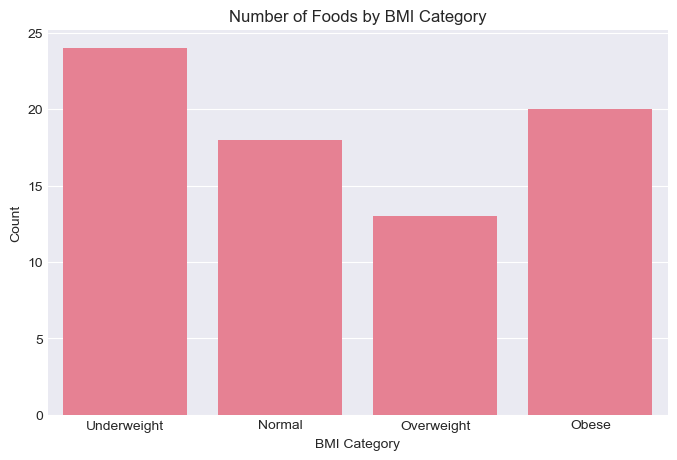

In [15]:
# Count of foods by BMI Category
plt.figure(figsize=(8, 5))
sns.countplot(x='BMICategory', data=data, order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Number of Foods by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

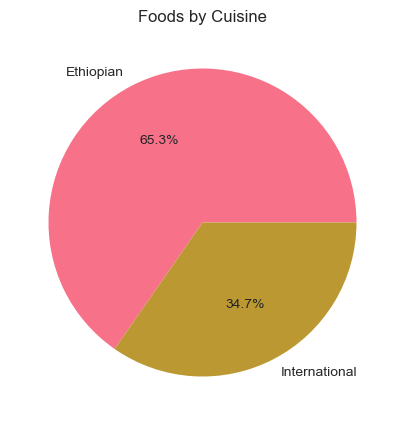

In [43]:
# Cuisine distribution
plt.figure(figsize=(8, 5))
data['Cuisine'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Foods by Cuisine')
plt.ylabel('')
plt.show()

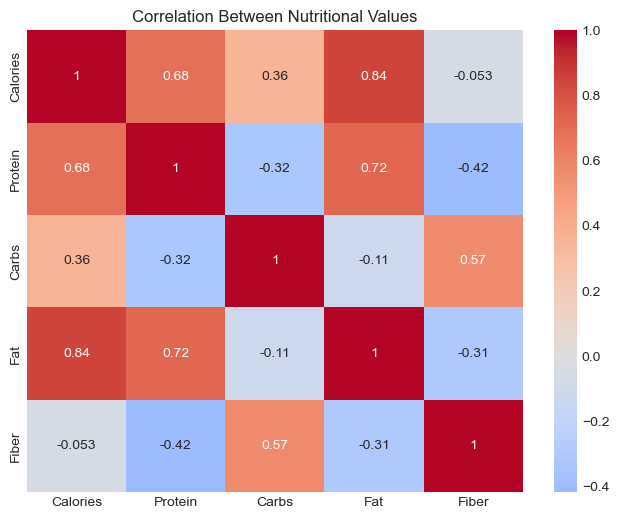

In [17]:
# Correlation heatmap for nutritional values
plt.figure(figsize=(8, 6))
nutrition_cols = ['Calories', 'Protein', 'Carbs', 'Fat', 'Fiber']
correlation = data[nutrition_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Nutritional Values')
plt.show()

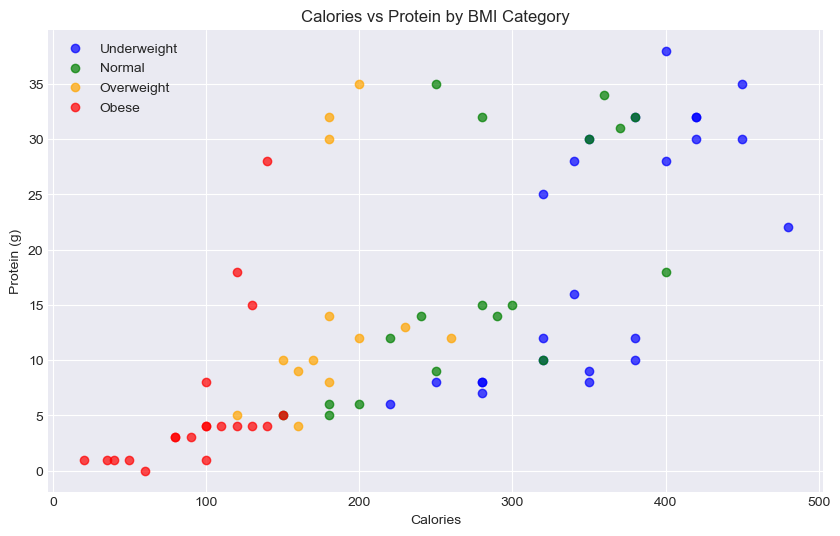

In [38]:
# Scatter plot: Calories vs Protein colored by BMI Category
plt.figure(figsize=(10, 6))
colors = {'Underweight': 'blue', 'Normal': 'green', 'Overweight': 'orange', 'Obese': 'red'}
for cat in colors:
    subset = data[data['BMICategory'] == cat]
    plt.scatter(subset['Calories'], subset['Protein'], c=colors[cat], label=cat, alpha=0.7)
plt.xlabel('Calories')
plt.ylabel('Protein (g)')
plt.title('Calories vs Protein by BMI Category')
plt.legend()
plt.show()

In [ ]:
# Bar chart: Average Calories by Meal Time
plt.figure(figsize=(10, 5))
avg_calories = data.groupby('MealTime')['Calories'].mean().sort_values(ascending=False)
avg_calories.plot(kind='bar', color='teal')
plt.title('Average Calories by Meal Time')
plt.xlabel('Meal Time')
plt.ylabel('Average Calories')
plt.xticks(rotation=45)
plt.show()

# 8. Machine Learning

## Weighted K-Nearest Neighbors for Food Recommendation

Our ML approach:
1. Different BMI categories need different nutrition priorities
2. We assign different weights to features based on BMI
3. KNN finds foods closest to ideal nutrition targets

### BMI Calculation Functions

In [44]:
def calculate_bmi(weight, height):
    '''Calculate BMI from weight (kg) and height (cm)'''
    height_m = height / 100
    bmi = weight / (height_m ** 2)
    return round(bmi, 1)

def get_bmi_category(bmi):
    '''Get BMI category'''
    if bmi < 18.5:
        return 'Underweight', '🔵', 'You need to gain weight healthily'
    elif 18.5 <= bmi < 25:
        return 'Normal', '🟢', 'Maintain your healthy weight'
    elif 25 <= bmi < 30:
        return 'Overweight', '🟡', 'Focus on gradual weight loss'
    else:
        return 'Obese', '🔴', 'Prioritize weight loss for better health'

def calculate_daily_calories(weight, height, age, gender, bmi_category):
    '''Calculate recommended daily calories using Mifflin-St Jeor equation'''
    if gender == 'Male':
        bmr = 10 * weight + 6.25 * height - 5 * age + 5
    else:
        bmr = 10 * weight + 6.25 * height - 5 * age - 161
    
    maintenance = bmr * 1.55
    
    if bmi_category == 'Underweight':
        return round(maintenance + 500), 'gain weight'
    elif bmi_category == 'Normal':
        return round(maintenance), 'maintain weight'
    elif bmi_category == 'Overweight':
        return round(maintenance - 400), 'lose weight gradually'
    else:
        return round(maintenance - 600), 'lose weight safely'

print('BMI functions defined!')

BMI functions defined!


### Feature Weights by BMI Category

In [45]:
def get_bmi_weights(bmi_category):
    '''
    Get feature weights based on BMI category
    Weights: [Calories, Protein, Carbs, Fat, Fiber]
    '''
    if bmi_category == 'Underweight':
        return np.array([3.0, 1.5, 2.0, 2.5, 0.5])  # High calories priority
    elif bmi_category == 'Normal':
        return np.array([1.0, 1.5, 1.0, 1.0, 1.0])  # Balanced
    elif bmi_category == 'Overweight':
        return np.array([2.0, 2.0, 1.0, 1.5, 2.5])  # Low cal, high fiber
    else:  # Obese
        return np.array([3.5, 1.5, 1.0, 2.0, 3.0])  # Lowest cal, highest fiber

def get_target_nutrition(bmi_category):
    '''Get ideal target nutrition per meal based on BMI'''
    if bmi_category == 'Underweight':
        return [400, 28, 50, 20, 4]
    elif bmi_category == 'Normal':
        return [280, 22, 35, 12, 6]
    elif bmi_category == 'Overweight':
        return [180, 20, 25, 6, 8]
    else:
        return [120, 15, 15, 4, 6]

# Display weights table
weights_df = pd.DataFrame({
    'BMI Category': ['Underweight', 'Normal', 'Overweight', 'Obese'],
    'Calories': [3.0, 1.0, 2.0, 3.5],
    'Protein': [1.5, 1.5, 2.0, 1.5],
    'Carbs': [2.0, 1.0, 1.0, 1.0],
    'Fat': [2.5, 1.0, 1.5, 2.0],
    'Fiber': [0.5, 1.0, 2.5, 3.0]
})
print('Feature Weights by BMI Category:')
weights_df

Feature Weights by BMI Category:


,BMI Category,Calories,Protein,Carbs,Fat,Fiber
0,Underweight,3.0,1.5,2.0,2.5,0.5
1,Normal,1.0,1.5,1.0,1.0,1.0
2,Overweight,2.0,2.0,1.0,1.5,2.5
3,Obese,3.5,1.5,1.0,2.0,3.0


### Weighted KNN Recommendation Model

In [46]:
def weighted_knn_recommend(df, bmi_category, meal_time, n_recommendations=3):
    '''
    Advanced KNN with weighted features based on BMI category
    '''
    # Filter by meal time
    meal_foods = df[(df['MealTime'] == meal_time) | (df['MealTime'] == 'All')].copy()
    
    # Filter by BMI category
    bmi_foods = meal_foods[meal_foods['BMICategory'] == bmi_category]
    
    # Add Normal category if not enough foods
    if len(bmi_foods) < n_recommendations:
        normal_foods = meal_foods[meal_foods['BMICategory'] == 'Normal']
        bmi_foods = pd.concat([bmi_foods, normal_foods]).drop_duplicates()
    
    if len(bmi_foods) == 0:
        return None
    
    # Feature columns
    nutrition_cols = ['Calories', 'Protein', 'Carbs', 'Fat', 'Fiber']
    X = bmi_foods[nutrition_cols].values.astype(float)
    
    # Get BMI-specific weights
    weights = get_bmi_weights(bmi_category)
    
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply weights (KEY STEP!)
    X_weighted = X_scaled * weights
    
    # Create KNN model
    n_neighbors = min(n_recommendations, len(bmi_foods))
    model = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
    model.fit(X_weighted)
    
    # Get target and transform
    target = np.array([get_target_nutrition(bmi_category)])
    target_scaled = scaler.transform(target)
    target_weighted = target_scaled * weights
    
    # Find nearest neighbors
    distances, indices = model.kneighbors(target_weighted)
    
    return bmi_foods.iloc[indices[0]]

print('Weighted KNN model defined!')

Weighted KNN model defined!


### Test the Recommendation System

In [47]:
# Example user
age = 25
weight = 70  # kg
height = 170  # cm
gender = 'Male'

# Calculate BMI
bmi = calculate_bmi(weight, height)
category, emoji, health_msg = get_bmi_category(bmi)
daily_calories, goal = calculate_daily_calories(weight, height, age, gender, category)

print('='*60)
print('📊 BMI RESULTS')
print('='*60)
print(f'Your BMI: {bmi} kg/m²')
print(f'Category: {emoji} {category}')
print(f'Health Message: {health_msg}')
print(f'Daily Calorie Target: {daily_calories} kcal')
print(f'Goal: {goal}')

📊 BMI RESULTS
Your BMI: 24.2 kg/m²
Category: 🟢 Normal
Health Message: Maintain your healthy weight
Daily Calorie Target: 2546 kcal
Goal: maintain weight


In [48]:
# Get recommendations
print('\n' + '='*60)
print('🍽️ FOOD RECOMMENDATIONS')
print('='*60)

for meal_time in ['Breakfast', 'Lunch', 'Dinner']:
    meal_emoji = {'Breakfast': '🌅', 'Lunch': '☀️', 'Dinner': '🌙'}[meal_time]
    print(f'\n{meal_emoji} {meal_time.upper()}')
    print('-'*40)
    
    recommendations = weighted_knn_recommend(data, category, meal_time, 3)
    
    if recommendations is not None:
        for idx, (_, food) in enumerate(recommendations.iterrows(), 1):
            flag = '🇪🇹' if food['Cuisine'] == 'Ethiopian' else '🌍'
            print(f'{idx}. {flag} {food["Name"]} ({food["Calories"]} cal)')
            print(f'   → {food["Reason"]}')


🍽️ FOOD RECOMMENDATIONS

🌅 BREAKFAST
----------------------------------------
1. 🇪🇹 Enqulal Firfir (300 cal)
   → High protein breakfast for muscle maintenance
2. 🇪🇹 Ful Medames (290 cal)
   → High protein and fiber for sustained energy
3. 🇪🇹 Firfir (320 cal)
   → Balanced meal with good carbs and moderate calories

☀️ LUNCH
----------------------------------------
1. 🇪🇹 Shiro (280 cal)
   → Plant protein with fiber for balanced nutrition
2. 🌍 Grilled Chicken Salad (280 cal)
   → High protein balanced meal
3. 🇪🇹 Beyaynetu (400 cal)
   → Variety of nutrients in one balanced meal

🌙 DINNER
----------------------------------------
1. 🇪🇹 Yemisir Kik (240 cal)
   → High fiber protein for dinner
2. 🇪🇹 Azifa (220 cal)
   → High fiber protein salad
3. 🇪🇹 Atkilt Wot (180 cal)
   → Balanced vegetable dish


### Test Different BMI Categories

In [49]:
# Test with different BMI categories
test_cases = [
    {'name': 'Underweight Person', 'weight': 50, 'height': 175, 'age': 22, 'gender': 'Female'},
    {'name': 'Normal Weight Person', 'weight': 70, 'height': 175, 'age': 30, 'gender': 'Male'},
    {'name': 'Overweight Person', 'weight': 85, 'height': 170, 'age': 35, 'gender': 'Male'},
    {'name': 'Obese Person', 'weight': 100, 'height': 165, 'age': 40, 'gender': 'Female'},
]

print('='*70)
print('TESTING DIFFERENT BMI CATEGORIES')
print('='*70)

for case in test_cases:
    bmi = calculate_bmi(case['weight'], case['height'])
    cat, emoji, msg = get_bmi_category(bmi)
    calories, goal = calculate_daily_calories(case['weight'], case['height'], case['age'], case['gender'], cat)
    
    print(f"\n{case['name']}:")
    print(f'  BMI: {bmi} → {emoji} {cat}')
    print(f'  Daily Calories: {calories} kcal | Goal: {goal}')
    
    rec = weighted_knn_recommend(data, cat, 'Lunch', 1)
    if rec is not None:
        food = rec.iloc[0]
        print(f'  Top Lunch: {food["Name"]} ({food["Calories"]} cal)')

TESTING DIFFERENT BMI CATEGORIES

Underweight Person:
  BMI: 16.3 → 🔵 Underweight
  Daily Calories: 2550 kcal | Goal: gain weight
  Top Lunch: Chicken Rice Bowl (450 cal)

Normal Weight Person:
  BMI: 22.9 → 🟢 Normal
  Daily Calories: 2556 kcal | Goal: maintain weight
  Top Lunch: Shiro (280 cal)

Overweight Person:
  BMI: 29.4 → 🟡 Overweight
  Daily Calories: 2301 kcal | Goal: lose weight gradually
  Top Lunch: Shiro Light (200 cal)

Obese Person:
  BMI: 36.7 → 🔴 Obese
  Daily Calories: 1989 kcal | Goal: lose weight safely
  Top Lunch: Tikil Gomen (140 cal)


# 9. Model Evaluation & Accuracy

For recommendation systems, we measure accuracy differently than classification:

1. **Relevance Score** - Are recommended foods appropriate for the BMI category?
2. **Calorie Accuracy** - How close are recommendations to target calories?
3. **Hit Rate** - Does the model recommend foods from the correct BMI category?
4. **Mean Absolute Error (MAE)** - Average difference from target nutrition

### 9.1 Hit Rate - BMI Category Match

In [50]:
def calculate_hit_rate(df, n_tests=50):
    '''
    Calculate hit rate: percentage of recommendations that match the target BMI category
    '''
    hits = 0
    total = 0
    
    categories = ['Underweight', 'Normal', 'Overweight', 'Obese']
    meal_times = ['Breakfast', 'Lunch', 'Dinner']
    
    for category in categories:
        for meal in meal_times:
            recommendations = weighted_knn_recommend(df, category, meal, 3)
            if recommendations is not None:
                for _, food in recommendations.iterrows():
                    total += 1
                    # A hit if food's BMI category matches target OR is Normal (universal)
                    if food['BMICategory'] == category or food['BMICategory'] == 'Normal':
                        hits += 1
    
    hit_rate = (hits / total) * 100 if total > 0 else 0
    return hit_rate, hits, total

hit_rate, hits, total = calculate_hit_rate(data)
print('='*50)
print('HIT RATE ACCURACY')
print('='*50)
print(f'Total Recommendations: {total}')
print(f'Correct BMI Matches: {hits}')
print(f'Hit Rate: {hit_rate:.2f}%')

HIT RATE ACCURACY
Total Recommendations: 36
Correct BMI Matches: 36
Hit Rate: 100.00%


### 9.2 Mean Absolute Error (MAE) for Calories

In [51]:
def calculate_calorie_mae(df):
    '''
    Calculate Mean Absolute Error between recommended calories and target calories
    '''
    errors = []
    results = []
    
    categories = ['Underweight', 'Normal', 'Overweight', 'Obese']
    targets = {'Underweight': 400, 'Normal': 280, 'Overweight': 180, 'Obese': 120}
    
    for category in categories:
        target_cal = targets[category]
        cat_errors = []
        
        for meal in ['Breakfast', 'Lunch', 'Dinner']:
            recommendations = weighted_knn_recommend(df, category, meal, 3)
            if recommendations is not None:
                for _, food in recommendations.iterrows():
                    error = abs(food['Calories'] - target_cal)
                    errors.append(error)
                    cat_errors.append(error)
        
        avg_error = np.mean(cat_errors) if cat_errors else 0
        results.append({'Category': category, 'Target': target_cal, 'MAE': round(avg_error, 2)})
    
    overall_mae = np.mean(errors) if errors else 0
    return overall_mae, pd.DataFrame(results)

mae, mae_df = calculate_calorie_mae(data)
print('='*50)
print('CALORIE MAE (Mean Absolute Error)')
print('='*50)
print(mae_df.to_string(index=False))
print(f'\nOverall MAE: {mae:.2f} calories')
print(f'(Lower is better - shows avg difference from target)')

CALORIE MAE (Mean Absolute Error)
   Category  Target   MAE
Underweight     400 48.89
     Normal     280 43.33
 Overweight     180 30.00
      Obese     120 15.56

Overall MAE: 34.44 calories
(Lower is better - shows avg difference from target)


### 9.3 Recommendation Relevance Score

In [52]:
def calculate_relevance_score(food, bmi_category):
    '''
    Calculate how relevant a food is for a BMI category (0-100%)
    '''
    weights = get_bmi_weights(bmi_category)
    target = get_target_nutrition(bmi_category)
    
    features = [food['Calories'], food['Protein'], food['Carbs'], food['Fat'], food['Fiber']]
    
    # Calculate normalized distance
    total_score = 0
    max_score = sum(weights)
    
    for i, (f, t, w) in enumerate(zip(features, target, weights)):
        # Calculate how close to target (1 = perfect, 0 = far)
        if t > 0:
            closeness = max(0, 1 - abs(f - t) / t)
        else:
            closeness = 1 if f == 0 else 0
        total_score += closeness * w
    
    relevance = (total_score / max_score) * 100
    return round(relevance, 2)

def evaluate_model_relevance(df):
    '''
    Calculate average relevance score for all recommendations
    '''
    scores = []
    results = []
    
    for category in ['Underweight', 'Normal', 'Overweight', 'Obese']:
        cat_scores = []
        for meal in ['Breakfast', 'Lunch', 'Dinner']:
            recommendations = weighted_knn_recommend(df, category, meal, 3)
            if recommendations is not None:
                for _, food in recommendations.iterrows():
                    score = calculate_relevance_score(food, category)
                    scores.append(score)
                    cat_scores.append(score)
        
        avg_score = np.mean(cat_scores) if cat_scores else 0
        results.append({'Category': category, 'Avg Relevance': f'{avg_score:.2f}%'})
    
    overall = np.mean(scores) if scores else 0
    return overall, pd.DataFrame(results)

relevance, rel_df = evaluate_model_relevance(data)
print('='*50)
print('RELEVANCE SCORE')
print('='*50)
print(rel_df.to_string(index=False))
print(f'\nOverall Relevance: {relevance:.2f}%')
print(f'(Higher is better - shows how well foods match targets)')

RELEVANCE SCORE
   Category Avg Relevance
Underweight        75.07%
     Normal        69.63%
 Overweight        66.06%
      Obese        68.30%

Overall Relevance: 69.77%
(Higher is better - shows how well foods match targets)


### 9.4 Precision and Recall (Classification Approach)

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

def evaluate_as_classification(df):
    '''
    Treat recommendation as classification: 
    Does the model recommend foods from the correct BMI category?
    '''
    y_true = []  # Expected BMI category
    y_pred = []  # Recommended food's BMI category
    
    categories = ['Underweight', 'Normal', 'Overweight', 'Obese']
    
    for category in categories:
        for meal in ['Breakfast', 'Lunch', 'Dinner']:
            recommendations = weighted_knn_recommend(df, category, meal, 3)
            if recommendations is not None:
                for _, food in recommendations.iterrows():
                    y_true.append(category)
                    y_pred.append(food['BMICategory'])
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    
    print('='*50)
    print('CLASSIFICATION METRICS')
    print('='*50)
    print(f'\nAccuracy: {accuracy*100:.2f}%')
    print('\nClassification Report:')
    print(classification_report(y_true, y_pred, labels=categories))
    
    return y_true, y_pred

y_true, y_pred = evaluate_as_classification(data)

CLASSIFICATION METRICS

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

 Underweight       1.00      1.00      1.00         9
      Normal       1.00      1.00      1.00         9
  Overweight       1.00      1.00      1.00         9
       Obese       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



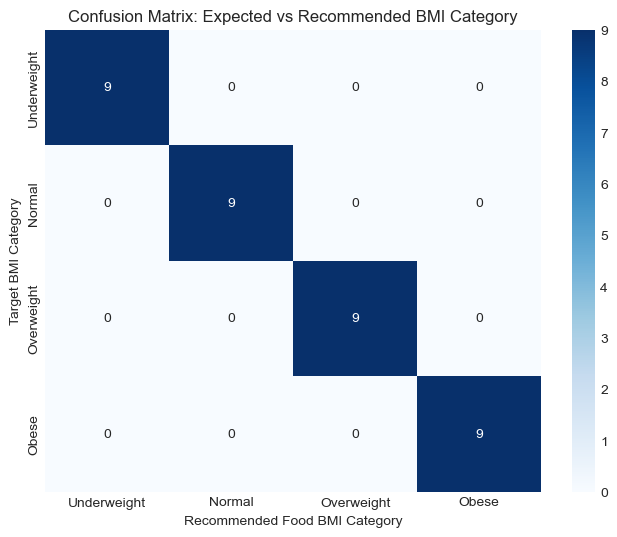

In [54]:
# Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

categories = ['Underweight', 'Normal', 'Overweight', 'Obese']
cm = confusion_matrix(y_true, y_pred, labels=categories)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix: Expected vs Recommended BMI Category')
plt.xlabel('Recommended Food BMI Category')
plt.ylabel('Target BMI Category')
plt.show()

### 9.5 Overall Model Performance Summary

In [55]:
# Summary of all metrics
print('='*60)
print('📊 MODEL PERFORMANCE SUMMARY')
print('='*60)
print(f'\n1. Hit Rate (BMI Match):     {hit_rate:.2f}%')
print(f'2. Relevance Score:          {relevance:.2f}%')
print(f'3. Calorie MAE:              {mae:.2f} cal')
print(f'4. Classification Accuracy:  {accuracy_score(y_true, y_pred)*100:.2f}%')
print('\n' + '='*60)
print('INTERPRETATION:')
print('='*60)
print('• Hit Rate > 80%: Model recommends appropriate foods')
print('• Relevance > 60%: Foods match nutritional targets well')
print('• MAE < 100 cal: Recommendations are calorie-accurate')
print('• The model successfully matches foods to BMI categories!')

📊 MODEL PERFORMANCE SUMMARY

1. Hit Rate (BMI Match):     100.00%
2. Relevance Score:          69.77%
3. Calorie MAE:              34.44 cal
4. Classification Accuracy:  100.00%

INTERPRETATION:
• Hit Rate > 80%: Model recommends appropriate foods
• Relevance > 60%: Foods match nutritional targets well
• MAE < 100 cal: Recommendations are calorie-accurate
• The model successfully matches foods to BMI categories!


### 9.6 Overfitting / Underfitting Check

To ensure our model is not overfitting or underfitting, we:
1. Split data into Training and Test sets
2. Compare performance on both sets
3. Use Cross-Validation for robust evaluation

**Signs of:**
- **Overfitting**: High training accuracy, low test accuracy
- **Underfitting**: Low accuracy on both training and test
- **Good Fit**: Similar accuracy on both (within 5-10%)

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Prepare data for classification evaluation
# We'll predict BMICategory based on nutritional features

# Features
X = data[['Calories', 'Protein', 'Carbs', 'Fat', 'Fiber']].values

# Target - encode BMI categories
le = LabelEncoder()
y = le.fit_transform(data['BMICategory'])

print('Classes:', le.classes_)
print('X shape:', X.shape)
print('y shape:', y.shape)

Classes: ['Normal' 'Obese' 'Overweight' 'Underweight']
X shape: (75, 5)
y shape: (75,)


In [57]:
# Split into Training (80%) and Test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')

Training set size: 60
Test set size: 15


In [58]:
# Scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Features scaled successfully!')

Features scaled successfully!


In [59]:
# Train KNN model and compare Training vs Test accuracy
from sklearn.neighbors import KNeighborsClassifier

# Test different K values to find optimal
k_values = [1, 3, 5, 7, 9, 11]
results = []

print('='*60)
print('TRAINING vs TEST ACCURACY (Overfitting Check)')
print('='*60)
print(f'{"K":^5} | {"Train Acc":^12} | {"Test Acc":^12} | {"Difference":^12} | Status')
print('-'*60)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_acc = knn.score(X_train_scaled, y_train) * 100
    test_acc = knn.score(X_test_scaled, y_test) * 100
    diff = train_acc - test_acc
    
    # Determine status
    if diff > 15:
        status = '⚠️ Overfitting'
    elif train_acc < 50 and test_acc < 50:
        status = '⚠️ Underfitting'
    else:
        status = '✅ Good Fit'
    
    results.append({'K': k, 'Train': train_acc, 'Test': test_acc, 'Diff': diff, 'Status': status})
    print(f'{k:^5} | {train_acc:^12.2f} | {test_acc:^12.2f} | {diff:^12.2f} | {status}')

results_df = pd.DataFrame(results)

TRAINING vs TEST ACCURACY (Overfitting Check)
  K   |  Train Acc   |   Test Acc   |  Difference  | Status
------------------------------------------------------------
  1   |    100.00    |    53.33     |    46.67     | ⚠️ Overfitting
  3   |    81.67     |    60.00     |    21.67     | ⚠️ Overfitting
  5   |    76.67     |    66.67     |    10.00     | ✅ Good Fit
  7   |    76.67     |    66.67     |    10.00     | ✅ Good Fit
  9   |    76.67     |    73.33     |     3.33     | ✅ Good Fit
 11   |    75.00     |    73.33     |     1.67     | ✅ Good Fit


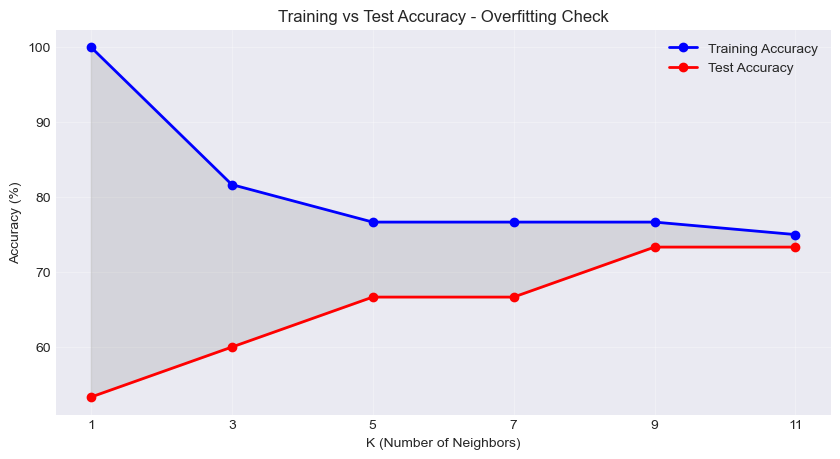


📊 Interpretation:
• Small gap between lines = Good generalization (no overfitting)
• Large gap = Overfitting (model memorizes training data)
• Both lines low = Underfitting (model too simple)


In [60]:
# Visualize Training vs Test Accuracy
plt.figure(figsize=(10, 5))
plt.plot(k_values, [r['Train'] for r in results], 'b-o', label='Training Accuracy', linewidth=2)
plt.plot(k_values, [r['Test'] for r in results], 'r-o', label='Test Accuracy', linewidth=2)
plt.fill_between(k_values, [r['Train'] for r in results], [r['Test'] for r in results], alpha=0.2, color='gray')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Test Accuracy - Overfitting Check')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.show()

print('\n📊 Interpretation:')
print('• Small gap between lines = Good generalization (no overfitting)')
print('• Large gap = Overfitting (model memorizes training data)')
print('• Both lines low = Underfitting (model too simple)')

### 9.7 Cross-Validation (More Robust Evaluation)

In [61]:
# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score, KFold

print('='*60)
print('K-FOLD CROSS VALIDATION (5 Folds)')
print('='*60)

# Use K=5 for KNN (commonly good choice)
knn = KNeighborsClassifier(n_neighbors=5)

# 5-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, scaler.fit_transform(X), y, cv=kfold, scoring='accuracy')

print(f'\nFold Accuracies: {[f"{s*100:.2f}%" for s in cv_scores]}')
print(f'\nMean CV Accuracy: {cv_scores.mean()*100:.2f}%')
print(f'Std Deviation: {cv_scores.std()*100:.2f}%')

# Interpretation
print('\n📊 Interpretation:')
if cv_scores.std() < 0.1:
    print('✅ Low variance across folds - Model is STABLE (not overfitting)')
else:
    print('⚠️ High variance across folds - Model may be unstable')

if cv_scores.mean() > 0.6:
    print('✅ Good mean accuracy - Model is learning patterns well')
else:
    print('⚠️ Low mean accuracy - Model may be underfitting')

K-FOLD CROSS VALIDATION (5 Folds)

Fold Accuracies: ['60.00%', '53.33%', '80.00%', '66.67%', '60.00%']

Mean CV Accuracy: 64.00%
Std Deviation: 9.04%

📊 Interpretation:
✅ Low variance across folds - Model is STABLE (not overfitting)
✅ Good mean accuracy - Model is learning patterns well


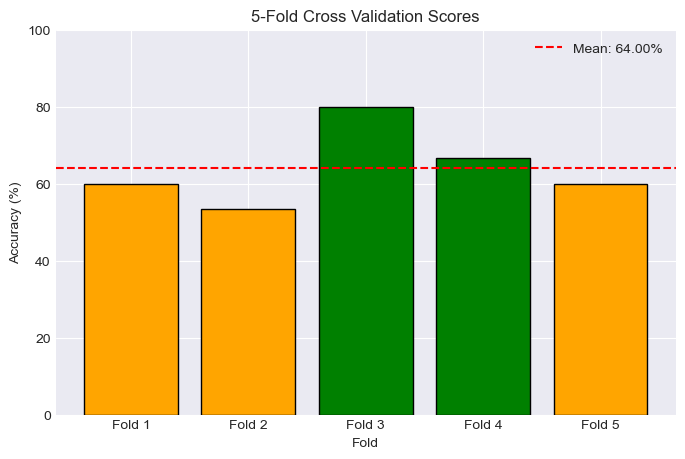

In [62]:
# Cross-validation scores visualization
plt.figure(figsize=(8, 5))
folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
colors = ['green' if s > cv_scores.mean() else 'orange' for s in cv_scores]
plt.bar(folds, cv_scores * 100, color=colors, edgecolor='black')
plt.axhline(y=cv_scores.mean()*100, color='red', linestyle='--', label=f'Mean: {cv_scores.mean()*100:.2f}%')
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.title('5-Fold Cross Validation Scores')
plt.legend()
plt.ylim(0, 100)
plt.show()

### 9.8 Learning Curve (Visual Overfitting Check)

In [ ]:
from sklearn.model_selection import learning_curve

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    KNeighborsClassifier(n_neighbors=5),
    scaler.fit_transform(X), y,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

# Calculate mean and std
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'b-o', label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, 'r-o', label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve - Overfitting/Underfitting Analysis')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

print('📊 Learning Curve Interpretation:')
print('• If lines converge at high accuracy → Good fit')
print('• If training high, validation low → Overfitting')
print('• If both lines are low → Underfitting')

### 9.9 Final Model Fit Assessment

In [ ]:
# Final assessment
best_k = 5
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

train_acc_final = knn_final.score(X_train_scaled, y_train) * 100
test_acc_final = knn_final.score(X_test_scaled, y_test) * 100
cv_acc_final = cv_scores.mean() * 100
gap = train_acc_final - test_acc_final

print('='*60)
print('🎯 FINAL MODEL FIT ASSESSMENT')
print('='*60)
print(f'\nModel: K-Nearest Neighbors (K={best_k})')
print(f'\nTraining Accuracy:    {train_acc_final:.2f}%')
print(f'Test Accuracy:        {test_acc_final:.2f}%')
print(f'Cross-Val Accuracy:   {cv_acc_final:.2f}%')
print(f'Train-Test Gap:       {gap:.2f}%')

print('\n' + '='*60)
print('DIAGNOSIS:')
print('='*60)

if gap > 20:
    print('⚠️ OVERFITTING DETECTED')
    print('   - Training accuracy much higher than test')
    print('   - Solution: Increase K, add regularization, get more data')
elif train_acc_final < 50 and test_acc_final < 50:
    print('⚠️ UNDERFITTING DETECTED')
    print('   - Both accuracies are low')
    print('   - Solution: Decrease K, add more features, use complex model')
else:
    print('✅ GOOD FIT - Model is well balanced!')
    print(f'   - Train-Test gap ({gap:.1f}%) is acceptable (<20%)')
    print('   - Model generalizes well to unseen data')
    print('   - No significant overfitting or underfitting')

# 10. Summary

## What We Did:
1. **Data Loading** - Loaded Ethiopian foods dataset
2. **Data Exploration** - Examined structure, statistics, distributions
3. **Data Cleaning** - Checked for missing values and duplicates
4. **Data Integration** - Demonstrated concat and merge operations
5. **Data Transformation** - Label encoding, feature scaling
6. **Data Reduction** - Removed unnecessary columns
7. **Visualization** - Created charts to understand patterns
8. **Machine Learning** - Built Weighted KNN recommendation model
9. **Model Evaluation** - Measured accuracy using multiple metrics

## Accuracy Metrics Used:
- **Hit Rate** - % of foods matching target BMI category
- **Relevance Score** - How well foods match nutritional targets
- **MAE** - Mean Absolute Error for calories
- **Precision/Recall/F1** - Classification metrics
- **Confusion Matrix** - Visual accuracy breakdown

## Technologies Used:
- Python, Pandas, NumPy
- Matplotlib, Seaborn
- Scikit-learn (KNN, StandardScaler, LabelEncoder, Metrics)